<a href="https://colab.research.google.com/github/fblondiaux/LGBIO2060-2020/blob/TP3part2/LGBIO2060_TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LGBIO2060 - Exercise session 3
Kalman filtering or how to implement the prior and likelihood dynamically? 


## Import and helper functions
**Please execute the cell below to initialize the notebook environment**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
def plot_my_system(state_evolution):
  """
  Do not edit this function...

  the aim of this function is to represent the time-evolution of a dynamical linear system
  Author : Antoine de Comite 
  """
  fig, ax = plt.subplots(figsize=(8,6))
  xlim = None
  ylim = None
  ax.scatter(state_evolution[0,:],state_evolution[1,:],c='m',s=100,alpha=0.7)
  ax.plot(state_evolution[0,:],state_evolution[1,:],LineWidth=2,c='k')
  ax.set_xlabel("x_1")
  ax.set_ylabel("x_2")
  ax.set(xlim=xlim)
  ax.set(ylim=ylim)
  return ax


def plot_my_system_with_obs(state_evolution,obs_evolution):
  """
  Do not edit this function...

  the aim of this function is to represent the time-evolution of a dynamical linear system
  Author : Antoine de Comite 
  """
  fig, ax = plt.subplots(figsize=(8,6))
  xlim = None
  ylim = None
  ax.scatter(state_evolution[0,:],state_evolution[1,:],c='m',s=100,alpha=0.7)
  ax.plot(state_evolution[0,:],state_evolution[1,:],LineWidth=2,c='k',label='Latent state')
  ax.plot(obs_evolution[0,:],obs_evolution[1,:],LineWidth=2,c='g',label='Observation')
  ax.set_xlabel("x_1")
  ax.set_ylabel("x_2")
  ax.set(xlim=xlim)
  ax.set(ylim=ylim)
  ax.legend()
  return ax

def plot_my_kalman_filter(state_evolution,obs_evolution,estimated_evolution):
  """
  DO NOT EDIT THIS FUNCTION
  author : antoine de Comite 
  """

  fig,ax = plt.subplots(figsize=(8,6))
  xlim = None; ylim = None
  ax.scatter(state_evolution[0,:],state_evolution[1,:],c='m',s=100,alpha=0.7)
  ax.plot(state_evolution[0,:],state_evolution[1,:],LineWidth=2,c='k',label='Latent state')
  ax.plot(obs_evolution[0,:],obs_evolution[1,:],LineWidth=2,c='g',label='Observation')
  ax.plot(est_evolution[0,:],obs_evolution[1,:],LineWidth=2,c='r',label='Estimation')
  ax.set_xlabel("x_1")
  ax.set_ylabel("x_2")
  ax.set(xlim=xlim)
  ax.set(ylim=ylim)
  ax.legend()
  return ax
  


## Tutorial objectives 

At the end of this tutorial, you should be able to explain the concepts of dynamical system and continuous dynamic application of Bayes' theorem. 

# Section 1 - Dynamical systems

In this tutorial, we will be applying Bayes' theorem to dynamical systems. A dynamical system is a system for which the time-evolution of any point can be described by a time-dependent function. Many systems that we encounter in our daily life are dynamical systems: eyes movements, reaching movements, walking, population dynamics,... 


A dynamical system can be observed through some noise and uncertainty similarly to fixed variable (see the first two tutorials). Therefore, in order to obtain the best estimate of the latent state of the system, we can apply Bayes theorem at every time step. This is what we will do in this tutorial.


A dynamical system has the following continuous and discrete forms, respectively : 

\begin{eqnarray}
& & \\
\dot{x}\left(t\right) & = & A x\left(t\right) + \xi\left(t\right)\\
& & \\
x\left[t+1\right] & = & A x\left[t\right] + \xi\left[t\right] \\
& & \\
\end{eqnarray}

where $A$ is called the **state-transition matrix** matrix and $\xi\left(t\right)$ is Gaussian white noise generated from $\mathcal{N}\left(0,\Omega_{\text{motor}}\right)$. $\Omega_{\text{motor}}$ is the covariance matrix of the motor noise.

The latent state $x$ can have more than one entry, for example we may want to estimate the x- and y-positions of a fly. In this case, the latent state will become a latent state vector $x = \left[x_1,x_2 \right]^T$ and the dynamical can be written : 


\begin{eqnarray}
&&\\
\begin{bmatrix}
  x_1[t+1] \\
  x_2[t+1]
  \end{bmatrix} &=& \begin{bmatrix}A_{11} & A_{12}\\ A_{21} & A_{22} \end{bmatrix}\begin{bmatrix}x_1[t]\\ x_2[t]\end{bmatrix} + \begin{bmatrix}\xi_1[t] \\ \xi_2[t] \end{bmatrix}
  &&\\
\end{eqnarray}

**Exercise 1 - Implement a function that defines the system mentionned above**

Hints : 
* You can assume that the covariance matrix of the motor noise is diagonal and that all the entries of the diagonal are equal to $\sigma_{\text{motor}}$.
* You will be performing matrix multiplications, consider this while implementing your function
* You can use the function *plot_my_system* to represent the time-evolution of your linear dynamical system





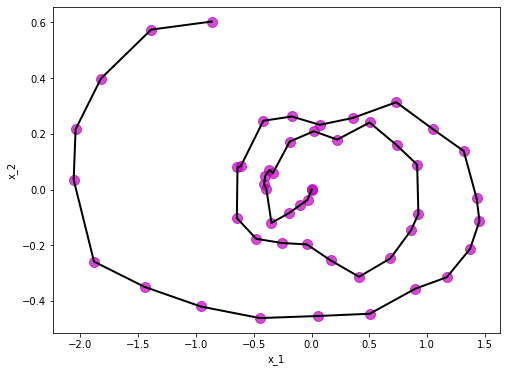

In [ ]:
def my_system(nsteps,x0,A,dt,sigma_motor):
  """
  my_system is a function that model the time-evolution of a linear dynamical system
  with state transition matrix A.
  Inputs : nsteps is the number of time steps to model
           x0 is the initial state (where we are starting from)
           A is the state-transition matrix
           dt is the time step used in the discretization
           sigma_motor is the std of the motor noise
  Outputs : state_evolution is a numpy array that contains the time-evolution of 
            the state vector
  """
  
  ######################
  ### your code here ###
  ######################

  
  return state_evolution

# Run the lines below to test your code

nsteps = 50
dt = 0.1
x0 = np.array([0,0]).T
A = np.array([[1., 1.], [-(2*np.pi/20.)**2., .9]])
sigma_motor = 0.05

######################
### your code here ###
######################

In [ ]:
print(state_evolution[:,:10])
print(A)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[ 1.          1.        ]
 [-0.09869604  0.9       ]]


**What is the effect of the noise covariance on the behaviour of the system?**


Play with the widget below to explore this effect. 

However, as we saw in the previous tutorials, our sensory inputs are not perfect and it is impossible to know the real latent state; we can only get a rough estimate of it. Mathematically, we can define the observation of the latent state of our dynamical system as follows: 


$\begin{eqnarray}
& & \\
y[t]& = & H x[t] + \eta[t]\\
 & & \\
\begin{bmatrix}y_1[t]\\ y_2[t]\end{bmatrix} & = &\begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix} \begin{bmatrix}x_1[t] \\ x_2[t]\end{bmatrix} + \begin{bmatrix}\eta_1[t]\\ \eta_2[t]\end{bmatrix}
& &\\
\end{eqnarray}$

where $H$ is the observation matrix and $\eta[t]$ is a vector of Gaussian white noise generated from $\mathcal{N}\left(0,\Omega_{\text{sensory}}\right)$. 

**Exercise 2 - Implement the observation of the latent state**

* you can use the function *plot_my_system_with_obs* for the plot

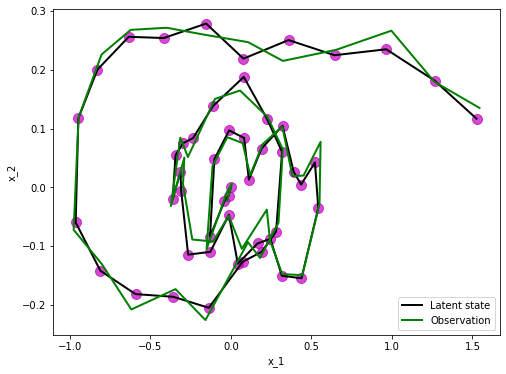

In [ ]:
def my_system_with_obs(nsteps,x0,A,H,dt,sigma_motor,sigma_sensory):
  """
  my_system_with_obs is a function that model the time-evolution of the latent state 
  and its observation
  """
  ######################
  ### your code here ###
  ######################

  return state_evolution,obs_evolution

# Run the lines below to test your code 
nsteps = 50
x0 = np.array([0,0]).T
A = np.array([[1.,1.],[-(2*np.pi/20.)**2.,0.9]])
H = np.eye(2)
sigma_motor = 0.05
sigma_sensory = 0.02
######################
### your code here ###
######################


**Compared to the first and second tutorials, what does the green line correspond to (in terms of Bayes' theorem?**

## Section 2 - Kalman filter or the optimal observation of continuous linear dynamical systems

Once again, our sensory inputs are not good enough to infer the position of the fly we are tracking. In order to have a better estimation of the fly's position at every time, we will use a continuous adaptation of Bayes' theorem: the **Kalman filter**. 

At every time step, the Kalman filter computes the weighted sum of the prior and the likelihood, weighted by a factor that characterises how trustable each term is. The result of this weighted sum will be the posterior distribution; this posterior distribution is the optimal estimator of the latent state of the system. 

The estimated state, denoted $\hat{x}$ is computed this way : 

$\begin{eqnarray}
& & \\
\hat{x}[t] & = & \text{trust}_{\text{prior}}x_{\text{prior}} + \text{trust}_{\text{likelihood}}x_{\text{likelihood}}\\
& & \\
\hat{x}[t+1] & = & A  \hat{x}[t]+ K[t]\left(y[t] - H \hat{x}[t]\right)\\
& & \\
\end{eqnarray}$

Where $K[t]$ is the Kalman gain evaluated at time $t$. These Kalman gains will be the weighting parameters that characterises how much we trust one source of information (prior and likelihood) over the other. Since these gains quantifies the trust we have in each source, they will be computed based on the covariances matrices of these two sources. The covariance matrix related to the prior is $\Omega_{\text{motor}}$ and the one related to the likelihood is $\Omega_{\text{sensory}}$. Therefore the gain of the kalman filter are recursively computed as follows:  

$\begin{eqnarray}
& & \\
K[t]& = &A\, \Sigma[t] \,H^T \left(H \,\Sigma[T]\,H^T+\Omega_{\text{motor}}\right)^{-1} \\
& & \\
\Sigma[t+1] & = & \Omega_{\text{sensory}} + \left(A-K[t]\,H\right)\Sigma[T]\,A^T
\end{eqnarray}$

Where $\Sigma[t] = \mathbb{C}\text{ov}\left\{\hat{x}[t]\right\}$ is the covariance matrix of the estimated state at time t. 


**Exercice 3 - Implement the function below to apply Kalman filter to the dynamical linear system**

Hints : **TODO**

In [ ]:
def my_kalman_filter(A,H,latent_state,omega_motor,omega_sensory):
  """
  my_kalman_filter computes and applies the Kalman filter to the system seen above

  Inputs: 
  Outputs : 
  """

  K = np.zeros([len(x0),len(x0)])
  Sigma = omega_sensory
  d_state = np.zeros([len(x0),nsteps+1])
  observed_state = np.zeros([(len(x0),nsteps+1])

  for ii in range(nsteps):
    K = A @ Sigma @ H.T @ np.linalg.inv(H @ Sigma @ H.T + omega_motor)
    Sigma = omega_sensory + (A - K @ H) @ Sigma @ A.T
    latent_state[:,ii+1] = A @ latent_state[:,ii] + np.random.multivariate(np.zeros([]))
    observed_state[:,ii] = H @ latent_state[:,ii] + np.random.mutivariate(np.zeros([2,2]),omega_sensory)
    estimated_state[:,ii+1]= A @ estimated_state[:,ii] + K @ (observed_state[:,ii]-H @ estimated_state[:,ii])

  return observed_state, estimated_state


# Run the lines below to test your code

# Parameters definition
omega_motor = 0.05 * np.eye(len(x0))
omega_sensory = 0.02 * np.eye(len(x0))

# plot --> see function preamble
# call the function
plot_my_kalman_filter(state_evolution,obs_evolution,estimated_evolution)
